# Project Aims

## This project aims to analyse and present how efficient _gasoline_ vehicles are in comparison to Hybrid(_HEVs_), Plug-in Hybrid(_PHEVs_) and alternative fuel(_Ethanol_) vehicles

## Initial Hypothesis
- **_Ethanol_** flex fuel will be less efficient than **_gasoline_** due to the former still being less energy dense at the current state of R&D 
- **_HEVs_** will be a little more efficient than both of the above, especially in city driving
- **_PHEVs_** will be even more efficient than **_HEVs_** due to having a typically longer electrical range, but also benefit from city driving

## Project Structure
1. Data Scraping
2. Data Parsing and Cleaning
3. Data Analysis and Visualisation

## Modules Used
- requests
- BeautifulSoup
- pandas
- BytesIO

## 1. Data Scraping

### Module(s) Used: requests

After much research, EPA's official site's page with multiple links of csv/excel files with comprehensive info of mutliple vehicles was very suitable for my project. The first step of data analysis project is to scrape this webpage and ensure the GET request was sucessful

In [1]:
#Getting the raw html content of a website with the required data using the requests module and ensuring it is successful
import requests
response = requests.get('https://www.fueleconomy.gov/feg/download.shtml')
print(response.status_code)
content = response.content

200


## 2. Data Parsing and Cleaning (Part 1)

### Module(s) Used: BeautifulSoup

The first part of data parsing and cleaning would be parsing. Specifically, it would be to extract all the file links(excel/csv) in the raw binary response content by opening it using BeautifulSoup. This is so that we can get these specific links in a separate GET request afterwards for anaysis.

In [2]:
#Checking the data in various downloadable files using BS4
from bs4 import BeautifulSoup as BS
soup = BS(content,'html5lib')

#Obtaining CSV file links
def csv_links(soup) -> list:
    csv_links = []
    for link in soup.find_all('a'):
        href = str(link.get('href'))
        if href.endswith('.csv'):
            csv_links.append(href)
    return csv_links

#Obtaining Excel file links
def excel_links(soup) -> list:
    excel_links = []
    for link in soup.find_all('a'):
        href = str(link.get('href'))
        if href.endswith('.xlsx'):
            excel_links.append(href)
    return excel_links

csv = csv_links(soup)
excel = excel_links(soup)

print(f'CSV links: {csv}\n\nExcel links: {excel}')        

CSV links: ['/feg/epadata/vehicles.csv']

Excel links: ['EPAGreenGuide/xls/all_alpha_25.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202025.xlsx', 'EPAGreenGuide/xls/all_alpha_24.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202024.xlsx', 'EPAGreenGuide/xls/all_alpha_23.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202023.xlsx', 'EPAGreenGuide/xls/all_alpha_22.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202022.xlsx', 'EPAGreenGuide/xls/all_alpha_21.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202021.xlsx', 'EPAGreenGuide/xls/all_alpha_20.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202020.xlsx', 'EPAGreenGuide/xls/all_alpha_19.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20Vehicle%20List%20for%20MY%202019.xlsx', 'EPAGreenGuide/xls/all_alpha_18.xlsx', '/feg/EPAGreenGuide/Smartway/xls/SmartWay%20

## 2. Data Parsing and Cleaning (Part 2) (Including a bit of 1. Data Scraping)

### Module(s) Used: requests, pandas, BytesIO

Now that we have extracted the file links, it is time to issue a GET request to those links to extract the content.

However, this request was unsuccessful oftentimes due to a request timeout error or the data collected was empty. As such, the GET request and its afterward storing/cleaning is within a try;except statement to handle and display such errors appropriately if they occur.

The response content from the GET request is also in raw binary form, so we need BytesIO to convert the content into a file-like object that pandas can utilise to read the excel file into a Dataframe.

Furthermore, we are going to clean this DataFrame first by dropping rows that have missing/incomplete data for easier and more complete analysis afterwards.

Feel free to check out the complete cleaned dataframe below by running the cell! (These multiple operations take time to execute completely so do be patient!)

In [3]:
#Download csv file
import pandas as pd
from io import BytesIO

#File directory extracted from BS4 is not the complete url
url = 'https://www.fueleconomy.gov/feg/' + excel[0]

#GET request and its error handling
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
    # Load the Excel file into a DataFrame
    excel_data = BytesIO(response.content)
    data = pd.read_excel(excel_data)

    # Set display options after loading data to show all rows of car models
    pd.set_option('display.max_rows', None)
    
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
except pd.errors.EmptyDataError as e:
    print(f"Error reading Excel data: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

#Dropping empty rows/vehicle records
data.dropna()
data.head(20)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,SHNXV01.54EC,large car,6,30,37,33,6,No,269
1,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,SHNXV01.54EC,large car,6,30,37,33,6,No,269
2,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,SHNXV02.0TDC,large car,5,21,28,24,5,No,371
3,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,SHNXV02.0TDC,large car,5,21,28,24,5,No,371
4,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,SHNXV01.55DC,large car,5,26,36,30,6,No,293
5,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,SHNXV01.55DC,large car,5,26,36,30,6,No,293
6,ACURA Integra A-Spec,1.5,4.0,SCV-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,SHNXV01.54EC,large car,6,29,36,32,6,No,277
7,ACURA Integra A-Spec,1.5,4.0,SCV-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,SHNXV01.54EC,large car,6,29,36,32,6,No,277
8,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,CA,L3ULEV70,California LEV-III ULEV70,SHNXT03.5CCC,small SUV,4,19,26,22,5,No,411
9,ACURA MDX,3.5,6.0,SemiAuto-10,2WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,SHNXT03.5CCC,small SUV,4,19,26,22,5,No,411


## 2. Data Parsing and Cleaning (Part 3)

### Module(s) Used: pandas

If you realised from observing the pandas DataFrame earlier, some column values were very varied and non-standardised. 

This is especially so of the Trans column showing the transmission of each car, with its values showing a varied max of various transmission types and their speeds in an integer usually appended to the back of the value. With the transmission being a key factor that can affect the fuel efficiency of a car, it is hence impoortant for us to standardise it for easier and more accurate analysis.

This is why I created a mapping function to parse through the entire DataFrame linearly and replace the trans column's value to a standardised one.

As most regular automatics are more predictable and consistent in their driving dynamic and thus fuel efficiency, I have decided to specifically only analyse cars with an automatic transmission, and only a few necessary columns that are either
- Efficiency Indicators
- Factors that have a likely impact on the fuel efficiency

Feel free to check the modified version of the DataFrame by running the below cell!

In [4]:
#Mapping function to return if the transmission type is automatic, manual, CVT or semi-automatic based on the specific type input as a parameter
def transmission_standardising(type : str):
    if type.startswith('Man-'):
        return 'Manual'
    elif type.startswith('Auto-') or type.startswith('SemiAuto-') or type.startswith('SCV-'):
        return 'Automatic'
    else:
        return type

#Apply the function to the dataframe to standardise the transmission column
data['Trans'] = data['Trans'].apply(transmission_standardising)
filter_cols = ['Model', 'Displ', 'Cyl', 'Drive', 'Fuel', 'Veh Class', 'City MPG', 'Hwy MPG', 'Cmb MPG']
auto_data = data[data['Trans'].str.contains('Automatic|CVT')][filter_cols]
auto_data.head(20)

,Model,Displ,Cyl,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG
0,ACURA Integra,1.5,4.0,2WD,Gasoline,large car,30,37,33
1,ACURA Integra,1.5,4.0,2WD,Gasoline,large car,30,37,33
6,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,29,36,32
7,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,29,36,32
8,ACURA MDX,3.5,6.0,2WD,Gasoline,small SUV,19,26,22
9,ACURA MDX,3.5,6.0,2WD,Gasoline,small SUV,19,26,22
10,ACURA MDX,3.5,6.0,4WD,Gasoline,small SUV,19,25,21
11,ACURA MDX,3.5,6.0,4WD,Gasoline,small SUV,19,25,21
12,ACURA MDX Type-S,3.0,6.0,4WD,Gasoline,standard SUV,17,21,19
13,ACURA MDX Type-S,3.0,6.0,4WD,Gasoline,standard SUV,17,21,19


## 2. Data Parsing and Cleaning (Part 4)

### Module(s) Used: pandas

After getting the columns we need of automatic cars, we can then separate them into the different vehicle fuel types just like how we wanted to initially compare them

Feel free to run and check the DataFrames for gasoline, HEVs and PHEVS in the 5 cells following this!

PS: I have only displayed the first 20 rows in the gasoline dataframe for presentability, feel free to adjust it where you deem necessary!

In [6]:
#Creating a sub-dataframe for gasoline cars
gasoline = auto_data[(auto_data['Fuel'] == 'Gasoline') & (~auto_data['Model'].str.contains('Hybrid|0h',case=False,regex=True))]

#Creating a sub-dataframe for gasoline/electric cars
hev = auto_data[(auto_data['Fuel'] == 'Gasoline') & (auto_data['Model'].str.contains('Hybrid|0h', case=False, regex=True))]
phev = auto_data[(auto_data['Fuel'] == 'Gasoline/Electricity') & (auto_data['Model'].str.contains('Hybrid|Prime|PHEV|0e|T8 Recharge',case=False, regex=True))]
ethanol = auto_data[auto_data['Fuel'] == 'Ethanol/Gas']

In [7]:
gasoline.head(20)

,Model,Displ,Cyl,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG
0,ACURA Integra,1.5,4.0,2WD,Gasoline,large car,30,37,33
1,ACURA Integra,1.5,4.0,2WD,Gasoline,large car,30,37,33
6,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,29,36,32
7,ACURA Integra A-Spec,1.5,4.0,2WD,Gasoline,large car,29,36,32
8,ACURA MDX,3.5,6.0,2WD,Gasoline,small SUV,19,26,22
9,ACURA MDX,3.5,6.0,2WD,Gasoline,small SUV,19,26,22
10,ACURA MDX,3.5,6.0,4WD,Gasoline,small SUV,19,25,21
11,ACURA MDX,3.5,6.0,4WD,Gasoline,small SUV,19,25,21
12,ACURA MDX Type-S,3.0,6.0,4WD,Gasoline,standard SUV,17,21,19
13,ACURA MDX Type-S,3.0,6.0,4WD,Gasoline,standard SUV,17,21,19


In [8]:
hev

,Model,Displ,Cyl,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG
906,LEXUS ES 300h,2.5,4.0,2WD,Gasoline,midsize car,43,44,44
907,LEXUS ES 300h,2.5,4.0,2WD,Gasoline,midsize car,43,44,44
920,LEXUS NX 350h,2.5,4.0,4WD,Gasoline,small SUV,41,37,39
921,LEXUS NX 350h,2.5,4.0,4WD,Gasoline,small SUV,41,37,39
924,LEXUS UX 300h,2.0,4.0,2WD,Gasoline,small car,45,41,43
925,LEXUS UX 300h,2.0,4.0,2WD,Gasoline,small car,45,41,43
926,LEXUS UX 300h,2.0,4.0,4WD,Gasoline,small car,44,40,42
927,LEXUS UX 300h,2.0,4.0,4WD,Gasoline,small car,44,40,42
928,LEXUS UX 300h,2.0,4.0,2WD,Gasoline,small car,45,41,43
929,LEXUS UX 300h,2.0,4.0,2WD,Gasoline,small car,45,41,43


In [9]:
phev

,Model,Displ,Cyl,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG
150,BMW 550e,3.0,6.0,4WD,Gasoline/Electricity,midsize car,23/64,26/70,24/67
151,BMW 550e,3.0,6.0,4WD,Gasoline/Electricity,midsize car,23/64,26/70,24/67
156,BMW 750e xDrive,3.0,6.0,4WD,Gasoline/Electricity,large car,24/60,27/72,25/65
157,BMW 750e xDrive,3.0,6.0,4WD,Gasoline/Electricity,large car,24/60,27/72,25/65
258,BMW X5 xDrive50e,3.0,6.0,4WD,Gasoline/Electricity,standard SUV,22/57,23/59,22/58
259,BMW X5 xDrive50e,3.0,6.0,4WD,Gasoline/Electricity,standard SUV,22/57,23/59,22/58
502,CHRYSLER Pacifica Hybrid,3.6,6.0,2WD,Gasoline/Electricity,minivan,29/87,30/77,30/82
503,CHRYSLER Pacifica Hybrid,3.6,6.0,2WD,Gasoline/Electricity,minivan,29/87,30/77,30/82
518,DODGE Hornet PHEV AWD,1.3,4.0,4WD,Gasoline/Electricity,small SUV,29/77,29/77,29/77
519,DODGE Hornet PHEV AWD,1.3,4.0,4WD,Gasoline/Electricity,small SUV,29/77,29/77,29/77


In [10]:
ethanol

,Model,Displ,Cyl,Drive,Fuel,Veh Class,City MPG,Hwy MPG,Cmb MPG
350,BUICK Encore GX,1.2,3.0,2WD,Ethanol/Gas,small SUV,22/30,23/31,22/30
351,BUICK Encore GX,1.2,3.0,2WD,Ethanol/Gas,small SUV,22/30,23/31,22/30
358,BUICK Envista,1.2,3.0,2WD,Ethanol/Gas,station wagon,20/28,24/32,22/30
359,BUICK Envista,1.2,3.0,2WD,Ethanol/Gas,station wagon,20/28,24/32,22/30
452,CHEVROLET Silverado,5.3,8.0,4WD,Ethanol/Gas,pickup,11/15,14/19,12/17
453,CHEVROLET Silverado,5.3,8.0,4WD,Ethanol/Gas,pickup,11/15,14/19,12/17
472,CHEVROLET Silverado 4WD Mud Terrain Tire,5.3,8.0,4WD,Ethanol/Gas,pickup,11/15,14/19,12/17
473,CHEVROLET Silverado 4WD Mud Terrain Tire,5.3,8.0,4WD,Ethanol/Gas,pickup,11/15,14/19,12/17
484,CHEVROLET Trailblazer,1.2,3.0,2WD,Ethanol/Gas,small SUV,22/30,23/31,22/30
485,CHEVROLET Trailblazer,1.2,3.0,2WD,Ethanol/Gas,small SUV,22/30,23/31,22/30


## 3. Data Analysis and Visualisation(Part 1)

## Gasoline VS Ethanol

### Module(s) Used: pandas, matplotlib

Feel free to run the 3 code cells below!

In this section of comparison, we can come to realise that in the ethanol dataframe, there are 3 key types of vehicle classes that comprise it. Hence, it would be a good idea to compare the efficiency ratios across all these classes in 3 separate bar plots for a more comprehensive and reliable analysis.

In the ethanol vehicles dataframe above, there were 2 sets of mpg values for each category, the former representing ethanol-only mpg and latter being regular gasoline mpg. Thus, we will only compare the former for ethanol vehicles against the latter to standardise other variables about each vehicle.  

As we can see, the ratio of efficiencies of gasoline vs ethanol is always greater than 1, showing that gasoline is more efficient that ethanol.

Specifically for pickup trucks like the Chevrolet Silverado and GMC Sierra, the ratio is either 1.42 combined or 1.36 otherwise.

This ratio is comparatively a little smaller overall for smaller vehicles like station wagons and small SUVs for which the ratio hovers between 1.33 and 1.40 over all the mpg categories, possibly due to the increased mass and thus energy need for pickups than these vehicles.

It is however interesting that specifically for city mpg of station wagons, the Chevrolet Trax's efficiency ratios between gasoline and ethanol is lesser than its Buick equivalentat the lowest 1.33 of all other calculated ratios, an anomaly in these data.

All of this data reinforces our original hypothesis that gasoline is in fact more efficient than ethanol, possibly due to gasoline being more energy-dense than ethanol.

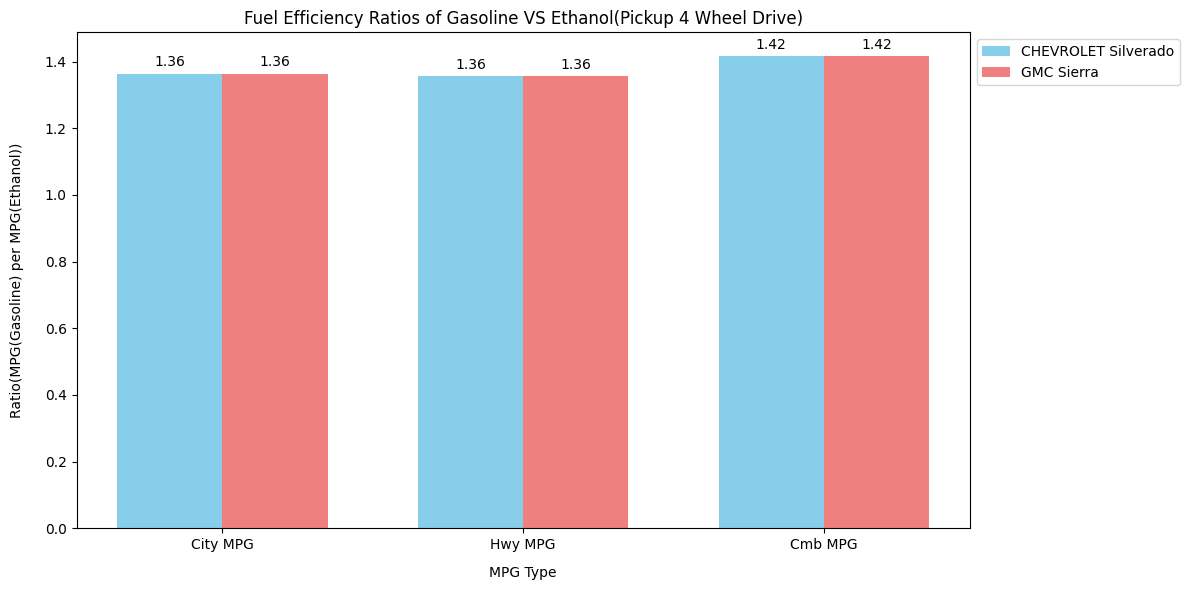

In [11]:
#Import statements
import matplotlib.pyplot as plt
import numpy as np

#Chevrolet Silverado
car = ethanol[(ethanol['Model'] == 'CHEVROLET Silverado') & (ethanol['Drive'] == '4WD')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

silverado_city_ratio_4wd = int(city.values[0][3:])/int(city.values[0][:2])
silverado_hwy_ratio_4wd = int(hwy.values[0][3:])/int(hwy.values[0][:2])
silverado_cmb_ratio_4wd = int(cmb.values[0][3:])/int(cmb.values[0][:2])

#GMC Sierra
car = ethanol[(ethanol['Model'] == 'GMC Sierra') & (ethanol['Drive'] == '4WD')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

sierra_city_ratio_4wd = int(city.values[0][3:])/int(city.values[0][:2])
sierra_hwy_ratio_4wd = int(hwy.values[0][3:])/int(hwy.values[0][:2])
sierra_cmb_ratio_4wd = int(cmb.values[0][3:])/int(cmb.values[0][:2])


#Chevrolet Trax
car = ethanol[(ethanol['Model'] == 'CHEVROLET Trax') & (ethanol['Drive'] == '2WD')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

trax_city_ratio_2wd = int(city.values[0][3:])/int(city.values[0][:2])
trax_hwy_ratio_2wd = int(hwy.values[0][3:])/int(hwy.values[0][:2])
trax_cmb_ratio_2wd = int(cmb.values[0][3:])/int(cmb.values[0][:2])

#Buick Envista
car = ethanol[(ethanol['Model'] == 'BUICK Envista') & (ethanol['Drive'] == '2WD')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

envista_city_ratio_2wd = int(city.values[0][3:])/int(city.values[0][:2])
envista_hwy_ratio_2wd = int(hwy.values[0][3:])/int(hwy.values[0][:2])
envista_cmb_ratio_2wd = int(cmb.values[0][3:])/int(cmb.values[0][:2])


#Chevrolet Trailblazer
car = ethanol[(ethanol['Model'] == 'CHEVROLET Trailblazer') & (ethanol['Drive'] == '2WD')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

trailblazer_city_ratio_2wd = int(city.values[0][3:])/int(city.values[0][:2])
trailblazer_hwy_ratio_2wd = int(hwy.values[0][3:])/int(hwy.values[0][:2])
trailblazer_cmb_ratio_2wd = int(cmb.values[0][3:])/int(cmb.values[0][:2])

#Buick Encore GX
car = ethanol[(ethanol['Model'] == 'BUICK Encore GX') & (ethanol['Drive'] == '2WD')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

encore_city_ratio_2wd = int(city.values[0][3:])/int(city.values[0][:2])
encore_hwy_ratio_2wd = int(hwy.values[0][3:])/int(hwy.values[0][:2])
encore_cmb_ratio_2wd = int(cmb.values[0][3:])/int(cmb.values[0][:2])


# Data for plotting
labels = ['City MPG', 'Hwy MPG', 'Cmb MPG']
silverado_ratios_4wd = [silverado_city_ratio_4wd, silverado_hwy_ratio_4wd, silverado_cmb_ratio_4wd]
sierra_ratios_4wd = [sierra_city_ratio_4wd, sierra_hwy_ratio_4wd, sierra_cmb_ratio_4wd]
trax_ratios_2wd = [trax_city_ratio_2wd, trax_hwy_ratio_2wd, trax_cmb_ratio_2wd]
envista_ratios_2wd = [envista_city_ratio_2wd, envista_hwy_ratio_2wd, envista_cmb_ratio_2wd]
trailblazer_ratios_2wd = [trailblazer_city_ratio_2wd, trailblazer_hwy_ratio_2wd, trailblazer_cmb_ratio_2wd]
encore_ratios_2wd = [encore_city_ratio_2wd, encore_hwy_ratio_2wd, encore_cmb_ratio_2wd]


x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig1, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x - width/2, silverado_ratios_4wd, width, label='CHEVROLET Silverado', color='skyblue')
bars2 = ax.bar(x + width/2, sierra_ratios_4wd, width, label='GMC Sierra', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('MPG Type',labelpad=10)
ax.set_ylabel('Ratio(MPG(Gasoline) per MPG(Ethanol))', labelpad=15)
ax.set_title('Fuel Efficiency Ratios of Gasoline VS Ethanol(Pickup 4 Wheel Drive)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Adjust layout
fig1.tight_layout()

# Display the plot
plt.show()

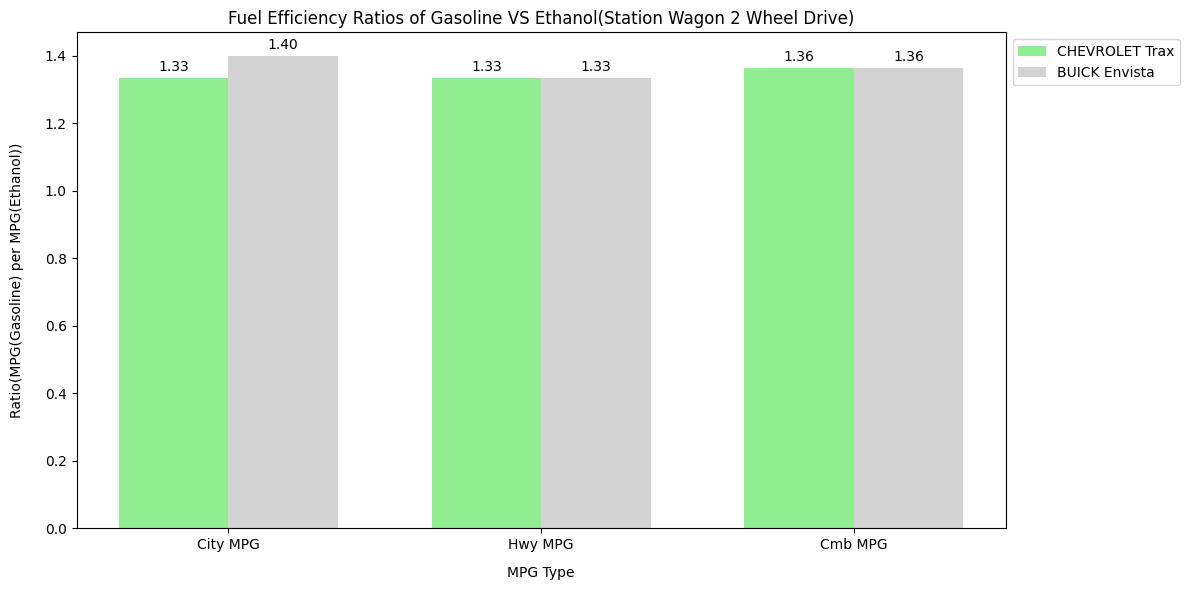

In [12]:
fig2, ax = plt.subplots(figsize=(12, 6))

bars3 = ax.bar(x - width/2, trax_ratios_2wd, width, label='CHEVROLET Trax', color='lightgreen')
bars4 = ax.bar(x + width/2, envista_ratios_2wd, width, label='BUICK Envista', color='lightgrey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('MPG Type',labelpad=10)
ax.set_ylabel('Ratio(MPG(Gasoline) per MPG(Ethanol))',labelpad=15)
ax.set_title('Fuel Efficiency Ratios of Gasoline VS Ethanol(Station Wagon 2 Wheel Drive)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

add_value_labels(bars3)
add_value_labels(bars4)

# Adjust layout
fig2.tight_layout()

# Display the plot
plt.show()

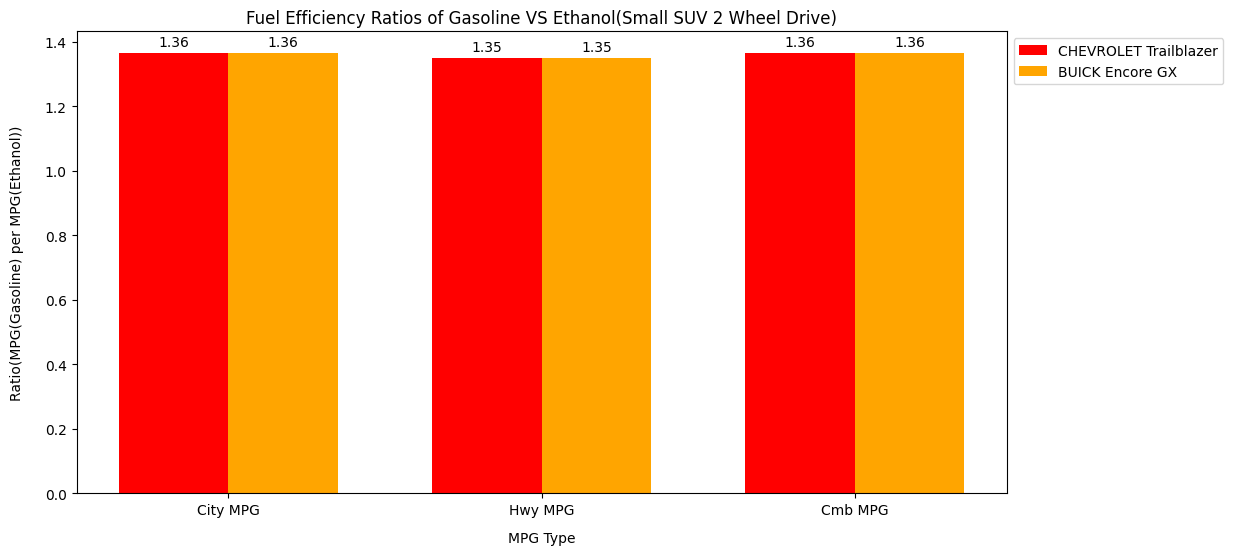

In [13]:
fig3, ax = plt.subplots(figsize=(12, 6))

bars5 = ax.bar(x - width/2, trailblazer_ratios_2wd, width, label='CHEVROLET Trailblazer', color='red')
bars6 = ax.bar(x + width/2, encore_ratios_2wd, width, label='BUICK Encore GX', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('MPG Type',labelpad=10)
ax.set_ylabel('Ratio(MPG(Gasoline) per MPG(Ethanol))',labelpad=15)
ax.set_title('Fuel Efficiency Ratios of Gasoline VS Ethanol(Small SUV 2 Wheel Drive)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

add_value_labels(bars5)
add_value_labels(bars6)

# Adjust layout
fig2.tight_layout()

# Display the plot
plt.show()

## 3. Data Analysis and Visualisation(Part 2)

## Gasoline VS HEVs

### Module(s) Used: pandas, matplotlib

Feel free to run the code cell below!

In this section of comparison, we can come to realise that between the gasoline and hev dataframe, there are 3 key types of common vehicle classes- 'Midsize Car', 'Small SUV' and 'Small Car'. However, only the first 2 classes have a distinct vehicle model that is offered with both gasoline and hybrid fuel types. Thus, it is more feasible here to display them in just 1 bar plot.

As we can see, the ratio of efficiencies of gasoline vs HEVs is always lower than 1, meanning that traditional gasoline hybrid vehicles are more efficient that pure gasoline ones. This is espcecially prominent for the city MPG ratio being close to 0.5! This could be due to the adavantage of regenerative braking systems being able to be used more often in the traffic-prone city than the highway for hybrids to recharge their batteries on the go, causing them to travel nearly twice that of pure gasoline cars for the same amount of gas.

All of this data reinforces our original hypothesis that traditional hybrid systems are in fact more efficient than gasoline especially in the city, due to the electricity conversion being much more efficient than gasoline's combustion to power the car. 

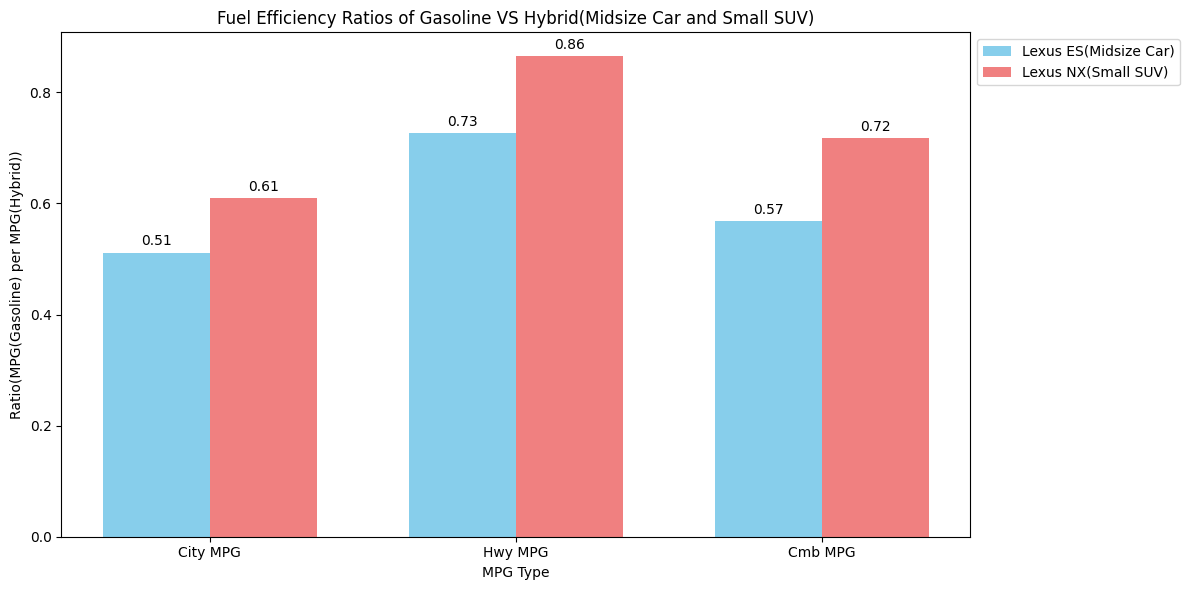

In [14]:
gasoline_midsize = gasoline[gasoline['Veh Class'] == 'midsize car']
gasoline_smallsuv = gasoline[gasoline['Veh Class'] == 'small SUV']

#Lexus ES350/ES300h
es350 = gasoline_midsize[(gasoline_midsize['Model'] == 'LEXUS ES 350') & (gasoline_midsize['Drive'] == '2WD')].head(1)
es350_city = es350['City MPG']
es350_hwy = es350['Hwy MPG']
es350_cmb = es350['Cmb MPG']

es300h = hev[(hev['Model'] == 'LEXUS ES 300h') & (hev['Drive'] == '2WD')].head(1)
es300h_city = es300h['City MPG']
es300h_hwy = es300h['Hwy MPG']
es300h_cmb = es300h['Cmb MPG']

es_city_ratio = int(es350_city.values[0])/int(es300h_city.values[0])
es_hwy_ratio = int(es350_hwy.values[0])/int(es300h_hwy.values[0])
es_cmb_ratio = int(es350_cmb.values[0])/int(es300h_cmb.values[0])

#Lexus NX250/NX350h  
nx250 = gasoline_smallsuv[(gasoline_smallsuv['Model'] == 'LEXUS NX 250') & (gasoline_smallsuv['Drive'] == '4WD')].head(1)
nx250_city = nx250['City MPG']
nx250_hwy = nx250['Hwy MPG']
nx250_cmb = nx250['Cmb MPG']

nx350h = hev[(hev['Model'] == 'LEXUS NX 350h') & (hev['Drive'] == '4WD')].head(1)
nx350h_city = nx350h['City MPG']
nx350h_hwy = nx350h['Hwy MPG']
nx350h_cmb = nx350h['Cmb MPG']

nx_city_ratio = int(nx250_city.values[0])/int(nx350h_city.values[0])
nx_hwy_ratio = int(nx250_hwy.values[0])/int(nx350h_hwy.values[0])
nx_cmb_ratio = int(nx250_cmb.values[0])/int(nx350h_cmb.values[0])


# Data for plotting
labels = ['City MPG', 'Hwy MPG', 'Cmb MPG']
es_ratios = [es_city_ratio, es_hwy_ratio, es_cmb_ratio]
nx_ratios = [nx_city_ratio, nx_hwy_ratio, nx_cmb_ratio]

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = plt.bar(x - width/2, es_ratios, width, label='Lexus ES(Midsize Car)', color='skyblue')
bars2 = plt.bar(x + width/2, nx_ratios, width, label='Lexus NX(Small SUV)', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('MPG Type')
ax.set_ylabel('Ratio(MPG(Gasoline) per MPG(Hybrid))')
ax.set_title('Fuel Efficiency Ratios of Gasoline VS Hybrid(Midsize Car and Small SUV)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## 3. Data Analysis and Visualisation(Part 3)

## Gasoline VS PHEVs

### Modules(s) Used: pandas, matplotlib, numpy


Feel free to run the 2 code cells below!

Now, we are on to the final comparison, Gasoline cars versus Plug-In Hybrids.

For this section, we can see that in the phev dataframe we have 5 different vehicle classes to compare from, which is too large to compress in one bar plot without compromising on its appearance. As such we have split them into 2 cells and bar plots, midsize and large sedans for the first plot as well as minivans, standard SUVs and small SUVs in the second.

Similar to the ethanol dataframes' mpg values, for PHEVs, the mpg values are also in pairs. The former value for each category is the gas-only mpg while the latter value is the MPGe(Miles Per Gallon equivalent) using the Plug-In Hybrid system, both of which are in general directly comparable to each other as MPGe measures the mileage per 33.7kWh of electricity, equivalent to the energy in a gallon of gasoline. Thus we will present our plotted values as indices representing the ratios of MPG per MPGe.


In general, the ratios are always lower than 0.5, dipping to around a third even for the City MPG ratio of the Chrysler Pacifica Minivan. This means that PHEVs are over 2 times as fuel efficient as gasoline ones, and also overshadow traditional hybrids. These efficiency gains are also more showing for the City MPG category, although larger luxurious sedans like the BMW 750e do not see as significant gains.

Overall, my hypothesis is reinforced by these findings, that PHEVs are most efficient over all of the other fuel types especially in the city except for the case of the BMW 750e.

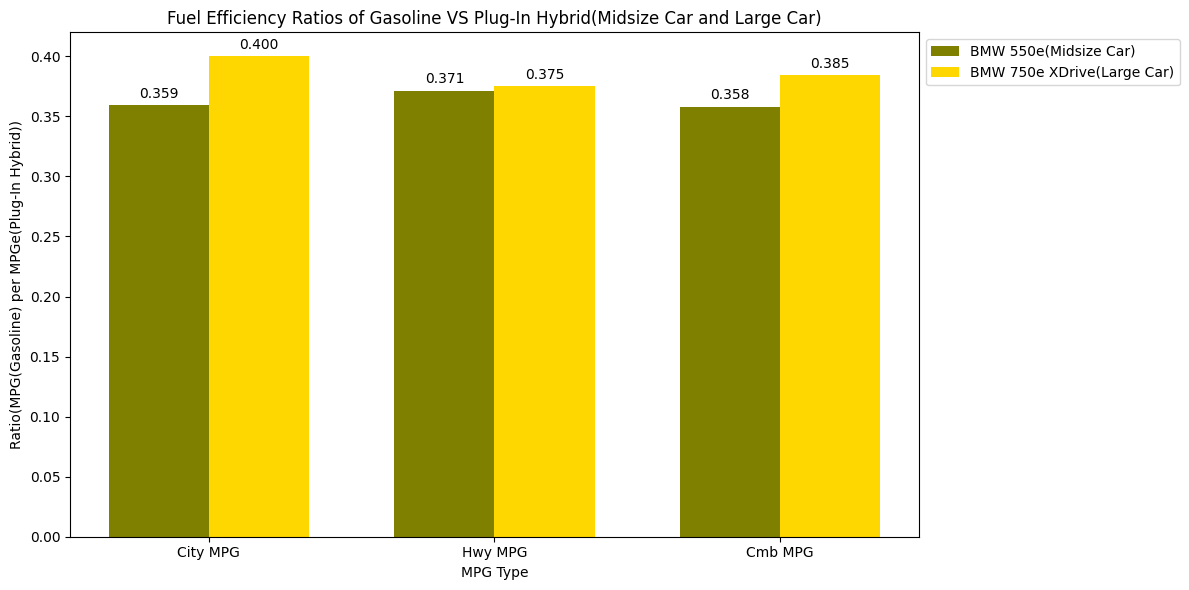

In [15]:
phev_standard_suv = phev[phev['Veh Class'] == 'standard SUV']
phev_small_suv = phev[phev['Veh Class'] == 'small SUV']

#BMW 550e
car  = phev[phev['Model'] == 'BMW 550e'].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

bmw550e_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
bmw550e_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
bmw550e_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])


#BMW 750e
car = phev[phev['Model'].str.contains('750e')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

bmw750e_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
bmw750e_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
bmw750e_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

# Data for plotting
labels = ['City MPG', 'Hwy MPG', 'Cmb MPG']
bmw550e_ratios = [bmw550e_city_ratio, bmw550e_hwy_ratio, bmw550e_cmb_ratio]
bmw750e_ratios = [bmw750e_city_ratio, bmw750e_hwy_ratio, bmw750e_cmb_ratio]


x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = plt.bar(x - width/2, bmw550e_ratios, width, label='BMW 550e(Midsize Car)', color='olive')
bars2 = plt.bar(x + width/2, bmw750e_ratios, width, label='BMW 750e XDrive(Large Car)', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('MPG Type')
ax.set_ylabel('Ratio(MPG(Gasoline) per MPGe(Plug-In Hybrid))')
ax.set_title('Fuel Efficiency Ratios of Gasoline VS Plug-In Hybrid(Midsize Car and Large Car)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

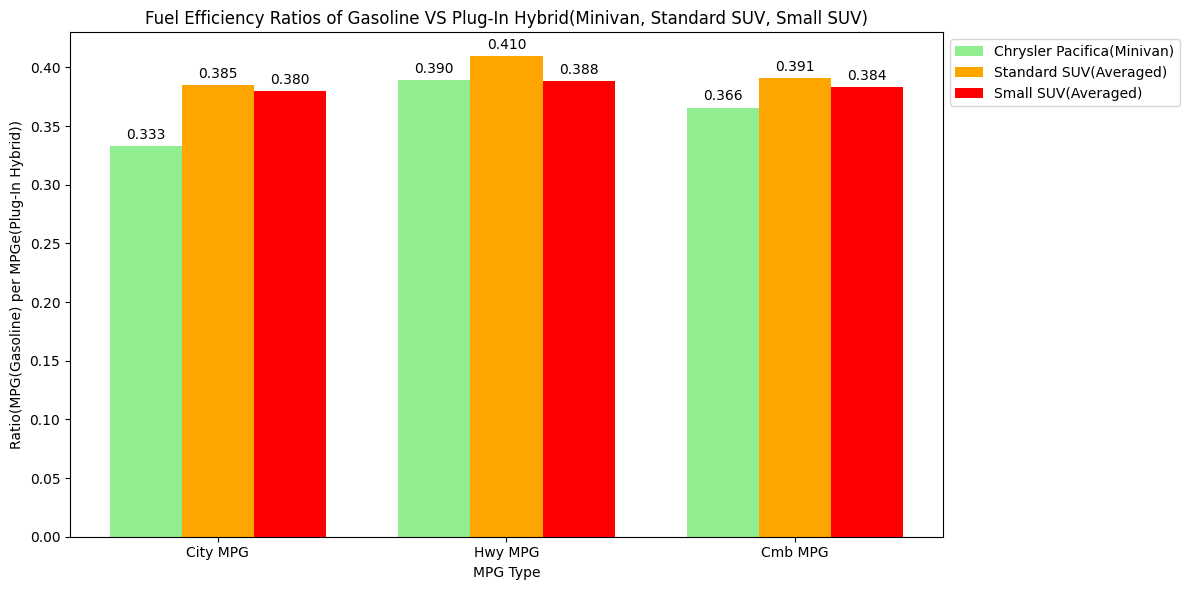

In [16]:
#Import Statement
import numpy as np

#Minivan

#Chrysler Pacifica
car = phev[phev['Model'].str.contains('Pacifica')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

pacifica_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
pacifica_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
pacifica_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

pacifica_ratios = [pacifica_city_ratio, pacifica_hwy_ratio, pacifica_cmb_ratio]

#Standard SUV

#BMW X5
car = phev[phev['Model'].str.contains('X5')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

x5_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
x5_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
x5_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

x5_ratios = [x5_city_ratio, x5_hwy_ratio, x5_cmb_ratio]

#LAND ROVER Range Rover P550/P460 PHEV
car = phev[phev['Model'].str.contains('LAND ROVER')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

p550_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
p550_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
p550_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

p550_ratios = [p550_city_ratio, p550_hwy_ratio, p550_cmb_ratio]

#Mercedes-Benz GLE
car = phev[phev['Model'].str.contains('GLE')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

gle_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
gle_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
gle_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

gle_ratios = [gle_city_ratio, gle_hwy_ratio, gle_cmb_ratio]

#Mitsubishi Outlander
car = phev[phev['Model'].str.contains('Outlander')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

outlander_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
outlander_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
outlander_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

outlander_ratios = [outlander_city_ratio, outlander_hwy_ratio, outlander_cmb_ratio]

#Averaging
standard_suv_ratios = np.array([x5_ratios, p550_ratios, gle_ratios, outlander_ratios])
standard_suv_average_ratios = np.mean(standard_suv_ratios, axis=0)

#Small SUV

#Dodge Hornet
car = phev[phev['Model'].str.contains('Hornet')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

hornet_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
hornet_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
hornet_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

hornet_ratios = [hornet_city_ratio, hornet_hwy_ratio, hornet_cmb_ratio]

#Mercedes GLC
car = phev[phev['Model'].str.contains('GLC')].head(1)
city = car['City MPG']
hwy = car['Hwy MPG']
cmb = car['Cmb MPG']

glc_city_ratio = int(city.values[0][:2])/int(city.values[0][3:])
glc_hwy_ratio = int(hwy.values[0][:2])/int(hwy.values[0][3:])
glc_cmb_ratio = int(cmb.values[0][:2])/int(cmb.values[0][3:])

glc_ratios = [glc_city_ratio, glc_hwy_ratio, glc_cmb_ratio]

#Averaging
small_suv_ratios = np.array([hornet_ratios, glc_ratios])
small_suv_average_ratios = np.mean(small_suv_ratios, axis=0)


# Data for plotting
labels = ['City MPG', 'Hwy MPG', 'Cmb MPG']

x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = plt.bar(x - width, pacifica_ratios, width, label='Chrysler Pacifica(Minivan)', color='lightgreen')
bars2 = plt.bar(x, standard_suv_average_ratios, width, label='Standard SUV(Averaged)', color='orange')
bars3 = plt.bar(x + width, small_suv_average_ratios, width, label='Small SUV(Averaged)', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('MPG Type')
ax.set_ylabel('Ratio(MPG(Gasoline) per MPGe(Plug-In Hybrid))')
ax.set_title('Fuel Efficiency Ratios of Gasoline VS Plug-In Hybrid(Minivan, Standard SUV, Small SUV)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Conclusion

Through this project, we have managed to verify all parts of our initial hypothesis.

Ethanol fuel truly is less efficient than gasoline at its current state of development, although there are hybrid fuels harnessing both sources such as E85, which is a flex-fuel combining both sources for a cleaner alternative to regular gasoline.

Furthermore, we observed that the degree of electrification of a car, ranging from pure Internal-Combustion to Hybrids and even Plug-In Hybrids, has a positive correlation with its fuel efficiency, and has also been widely recognised to be less polluting.

At the same time, most battery packs currently developed for hybrid/electric cars require mining and extraction of metals such as lithium for their manufacture, causing detriments to the environment such as soil erosion and deforestation.

Looking ahead, it is imperative to pursue more environmentally friendly manufacturing methods for battery packs while also developing more energy dense ethanol/flex-fuels. By doing so, we can reduce our reliance on gasoline as a fuel and promote a more environmentally friendly energy landscape.